In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("People+Attrition.xlsx")
df.head()

,S.No.,Gender,Department,JobRole,MaritalStatus,JobSatisfaction,HourlyRate,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,EnvironmentRating,YearsAtCompany,YearsInCurrentRole,Age,DistanceFromHome,YearsWithCurrManager,Attrition
0,1,Female,Sales,Sales Executive,Single,4,94.0,5993,11,3.0,8,1,6,4,41,1,5,Yes
1,2,Male,Research & Development,Research Scientist,Married,2,61.0,5130,23,4.0,10,3,10,7,49,8,7,No
2,3,Male,Research & Development,Laboratory Technician,Single,3,92.0,2090,15,3.0,7,3,0,0,37,2,0,Yes
3,4,Female,Research & Development,Research Scientist,Married,3,56.0,2909,11,3.0,8,3,8,7,33,3,0,No
4,5,Male,Research & Development,Laboratory Technician,Married,2,40.0,3468,12,3.0,6,3,2,2,27,2,2,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.No.                 1470 non-null   int64  
 1   Gender                1470 non-null   object 
 2   Department            1470 non-null   object 
 3   JobRole               1470 non-null   object 
 4   MaritalStatus         1470 non-null   object 
 5   JobSatisfaction       1470 non-null   int64  
 6   HourlyRate            1469 non-null   float64
 7   MonthlyIncome         1470 non-null   int64  
 8   PercentSalaryHike     1470 non-null   int64  
 9   PerformanceRating     1469 non-null   float64
 10  TotalWorkingYears     1470 non-null   int64  
 11  EnvironmentRating     1470 non-null   int64  
 12  YearsAtCompany        1470 non-null   int64  
 13  YearsInCurrentRole    1470 non-null   int64  
 14  Age                   1470 non-null   int64  
 15  DistanceFromHome     

In [4]:
df.describe()

,S.No.,JobSatisfaction,HourlyRate,MonthlyIncome,PercentSalaryHike,PerformanceRating,TotalWorkingYears,EnvironmentRating,YearsAtCompany,YearsInCurrentRole,Age,DistanceFromHome,YearsWithCurrManager
count,1470.000000,1470.000000,1469.000000,1470.000000,1470.000000,1469.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.499320,2.808163,65.886998,6502.931293,15.209524,3.153846,11.279592,2.761224,7.008163,4.229252,36.923810,9.192517,4.123129
std,424.497907,1.083292,20.335725,4707.956783,3.659938,0.360924,7.780782,0.706476,6.126525,3.623137,9.135373,8.106864,3.568136
min,1.000000,1.000000,30.000000,1009.000000,11.000000,3.000000,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,0.000000
25%,368.250000,2.000000,48.000000,2911.000000,12.000000,3.000000,6.000000,2.000000,3.000000,2.000000,30.000000,2.000000,2.000000
50%,735.500000,3.000000,66.000000,4919.000000,14.000000,3.000000,10.000000,3.000000,5.000000,3.000000,36.000000,7.000000,3.000000
75%,1102.750000,4.000000,84.000000,8379.000000,18.000000,3.000000,15.000000,3.000000,9.000000,7.000000,43.000000,14.000000,7.000000
max,1470.000000,4.000000,100.000000,19999.000000,25.000000,4.000000,40.000000,4.000000,40.000000,18.000000,60.000000,29.000000,17.000000


**Data cleaning**

In [5]:
df.isnull().sum()

S.No.                   0
Gender                  0
Department              0
JobRole                 0
MaritalStatus           0
JobSatisfaction         0
HourlyRate              1
MonthlyIncome           0
PercentSalaryHike       0
PerformanceRating       1
TotalWorkingYears       0
EnvironmentRating       0
YearsAtCompany          0
YearsInCurrentRole      0
Age                     0
DistanceFromHome        0
YearsWithCurrManager    0
Attrition               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#garbage values
for i in df.columns:
    if df[i].dtype == "object":
        print(df[i].value_counts())
        print("**************************************")

Male      883
Female    587
Name: Gender, dtype: int64
**************************************
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
**************************************
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
**************************************
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
**************************************
No     1233
Yes     237
Name: Attrition, dtype: int64
**************************************


**In data cleaning part we can see there is no null values , no duplicate values as well as no garbage values present in the data**

**EDA**

In [8]:
pd.crosstab(df.Attrition,df.Department)

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [9]:
pd.crosstab(df.Attrition,df.Gender)

Gender,Female,Male
Attrition,,
No,500,733
Yes,87,150


In [12]:
df.groupby('Gender')['MonthlyIncome'].mean()

Gender
Female    6671.676320
Male      6390.753114
Name: MonthlyIncome, dtype: float64

In [13]:
df.groupby(['Department','Attrition'])['MonthlyIncome'].mean()

Department              Attrition
Human Resources         No           7345.980392
                        Yes          3715.750000
Research & Development  No           6630.326087
                        Yes          4108.075188
Sales                   No           7232.240113
                        Yes          5908.456522
Name: MonthlyIncome, dtype: float64

In [72]:
df.groupby('JobRole')['Age','MonthlyIncome'].mean()

C:\Users\sai prathyusha\AppData\Local\Temp\ipykernel_11920\74012611.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('JobRole')['Age','MonthlyIncome'].mean()


,Age,MonthlyIncome
JobRole,,
Healthcare Representative,39.809160,7528.763359
Human Resources,35.500000,4235.750000
Laboratory Technician,34.096525,3237.169884
Manager,46.764706,17181.676471
Manufacturing Director,38.296552,7295.137931
Research Director,44.000000,16033.550000
Research Scientist,34.236301,3239.972603
Sales Executive,36.889571,6924.279141
Sales Representative,30.361446,2626.000000


In [73]:
df.columns

Index(['Gender', 'Department', 'JobRole', 'MaritalStatus', 'JobSatisfaction',
       'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'PerformanceRating',
       'TotalWorkingYears', 'EnvironmentRating', 'YearsAtCompany',
       'YearsInCurrentRole', 'Age', 'DistanceFromHome', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')

**Visualization**

In [27]:
df.columns

Index(['S.No.', 'Gender', 'Department', 'JobRole', 'MaritalStatus',
       'JobSatisfaction', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'EnvironmentRating',
       'YearsAtCompany', 'YearsInCurrentRole', 'Age', 'DistanceFromHome',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [30]:
df.drop(columns=['S.No.'],axis=1,inplace=True)  #we delete the col s.no coz there is no longer use of this

<AxesSubplot:ylabel='Attrition'>

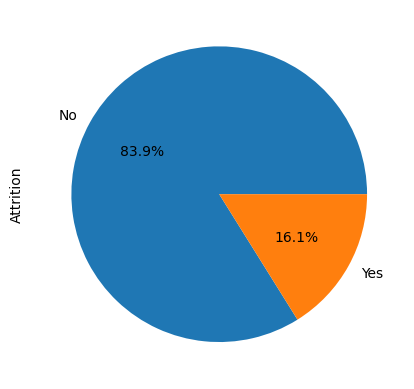

In [40]:
df['Attrition'].value_counts().plot(kind = "pie",autopct = "%1.1f%%")

<AxesSubplot:xlabel='Gender,Attrition'>

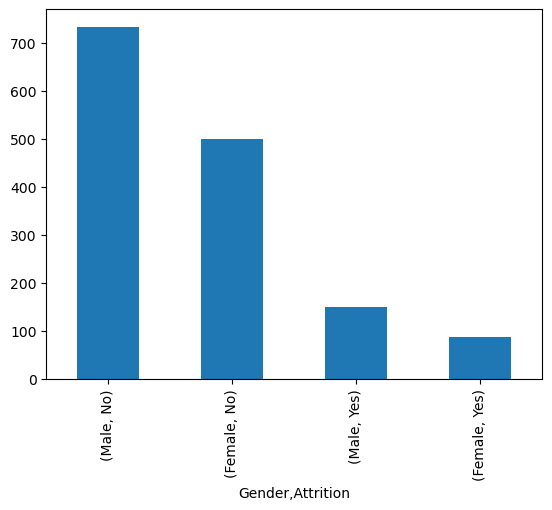

In [45]:
data = df[["Gender","Attrition"]].value_counts()
data.plot(kind = "bar", x = 'Gender''Attrition',y = "sum")

<AxesSubplot:>

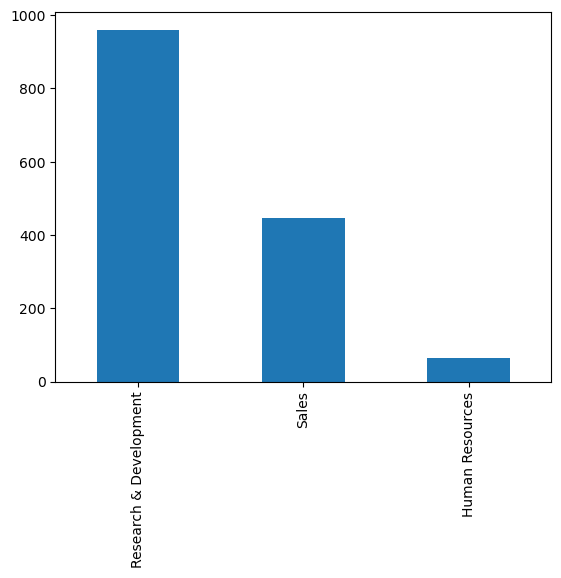

In [47]:
df['Department'].value_counts().plot(kind = "bar")

<AxesSubplot:xlabel='Department,Attrition'>

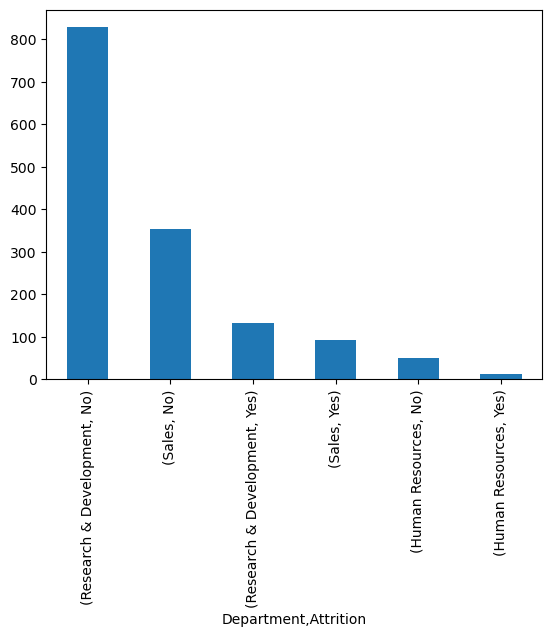

In [46]:
data = df[["Department","Attrition"]].value_counts()
data.plot(kind = "bar", x = 'Department''Attrition',y = "sum")

<AxesSubplot:>

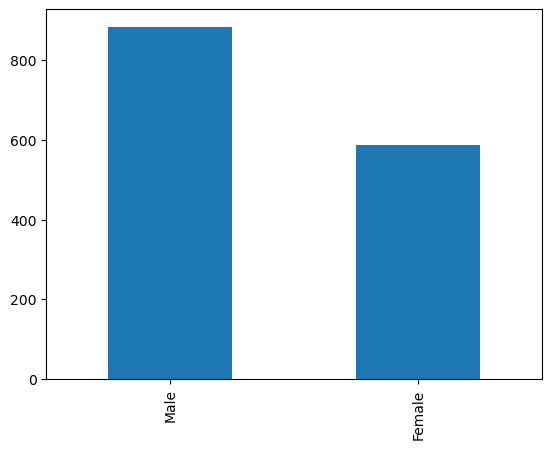

In [49]:
df['Gender'].value_counts().plot(kind = "bar")

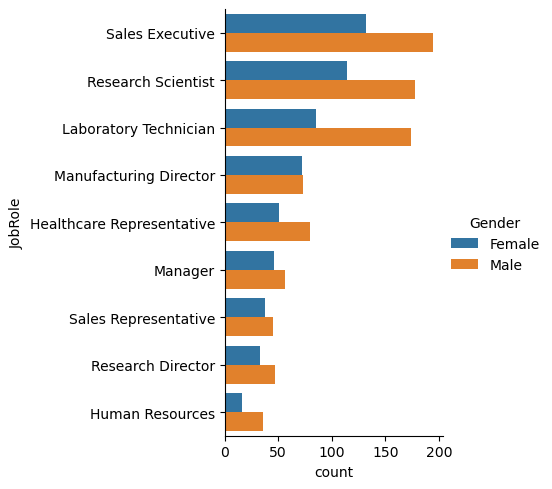

In [56]:
sns.catplot(data=df, y = 'JobRole',hue="Gender",kind='count')

<AxesSubplot:xlabel='Age', ylabel='JobRole'>

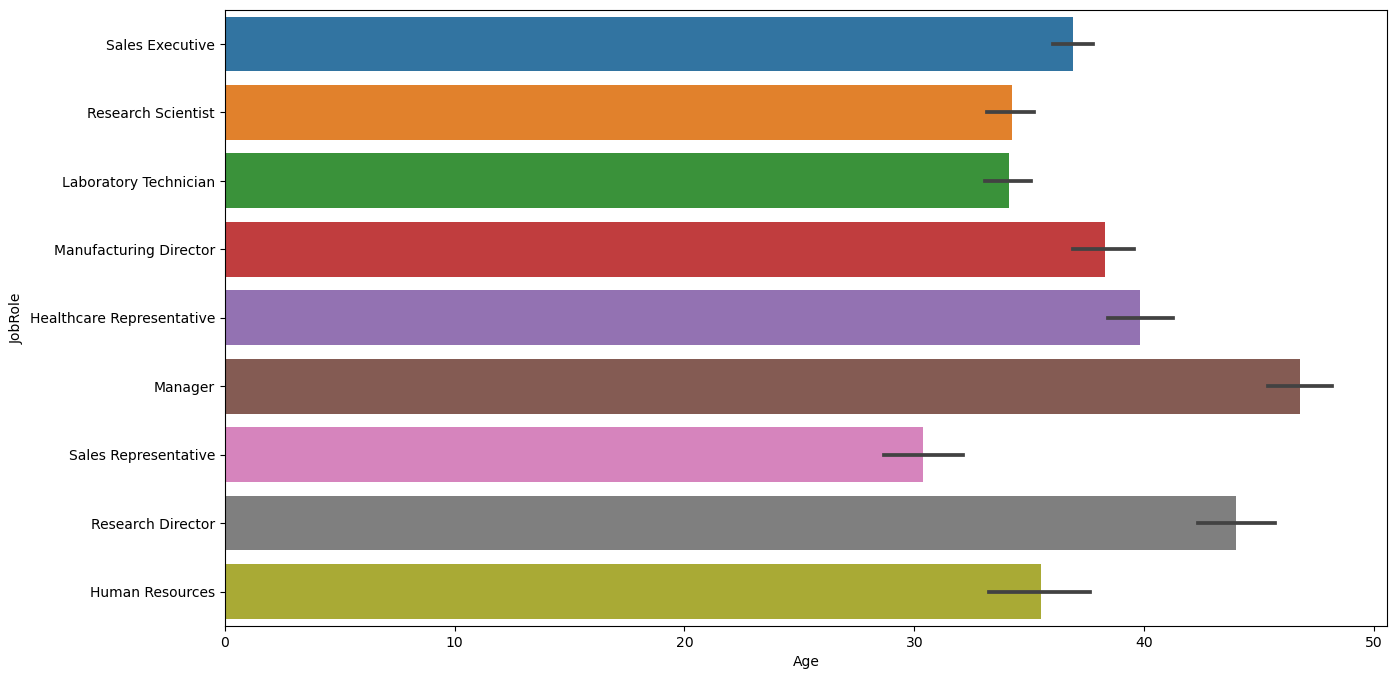

In [61]:
plt.figure(figsize=(15,8))
sns.barplot(data=df,x = 'Age',y = 'JobRole')

<AxesSubplot:xlabel='MonthlyIncome', ylabel='PercentSalaryHike'>

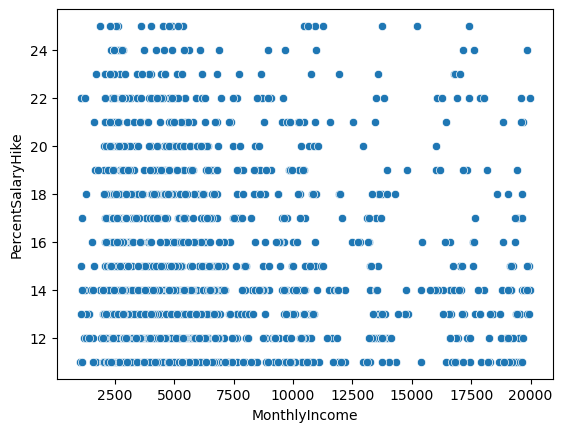

In [67]:
sns.scatterplot(data=df,x = "MonthlyIncome",y="PercentSalaryHike")